In [ ]:
pip install -U albumentations==0.4.6 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import importlib

In [3]:
'!git clone https://github.com/GL-MPP/EVA7-Main-Repository.git'

'!git clone https://github.com/GL-MPP/EVA7-Main-Repository.git'

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/EVA-7-Repo/Models')


In [ ]:
import custom_resnet
importlib.reload(custom_resnet)
from custom_resnet import Create_Model

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/EVA-7-Repo')

In [ ]:
import utils
importlib.reload(utils)
from utils import *

In [ ]:
install_pkg()

In [ ]:
import main
importlib.reload(main)
from main import *

In [ ]:
'''PATH = "/content/drive/MyDrive/EVA-7-Repo/Models/Model.h5"
model = torch.load(PATH,map_location=torch.device('cpu'))'''

'PATH = "/content/drive/MyDrive/EVA-7-Repo/Models/Model.h5"\nmodel = torch.load(PATH,map_location=torch.device(\'cpu\'))'

In [ ]:
'''import NS_custom_resnet
importlib.reload(NS_custom_resnet)
from NS_custom_resnet import CustomResnet'''

'import NS_custom_resnet\nimportlib.reload(NS_custom_resnet)\nfrom NS_custom_resnet import CustomResnet'

In [ ]:
## Generic parameters for this model
epoch = 24
batch_size = 512
lr = .001*batch_size/64 # Increase LR with batch size

Initializing model with step LR scheduler

In [ ]:
#torch.cuda.empty_cache()
model = Create_Model()
model,optimizer,device,lr_scheduler = initialize_model(p_model = model, p_lr = lr, p_train_mode = 'N')
#6,573,130/757,931 params

==> Initializing Model...
==> Model initilaized on  cuda
==> Initializing Optimizer...
==> Adam optimizer initialized
==> LR Scheduler initialized to StepLR to find the max LR with min Loss
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 3, 32, 32]              27
       BatchNorm2d-2            [-1, 3, 32, 32]               6
              ReLU-3            [-1, 3, 32, 32]               0
            Conv2d-4           [-1, 64, 32, 32]             192
       BatchNorm2d-5           [-1, 64, 32, 32]             128
              ReLU-6           [-1, 64, 32, 32]               0
            Conv2d-7           [-1, 64, 32, 32]             576
       BatchNorm2d-8           [-1, 64, 32, 32]             128
              ReLU-9           [-1, 64, 32, 32]               0
           Conv2d-10          [-1, 128, 32, 32]           8,192
        MaxPool2d-11          [-1, 128, 1

Downloading dataset and setting transformation rules

In [ ]:

train_loader,test_loader,test_set = prepare_data(p_batch_size = batch_size)

==> Preparing Dataset..
==> Downloading data..
Files already downloaded and verified
Files already downloaded and verified
==> Preparing Transforms and Augmentation rules
==> Preparing Train/Test loaders


Running the model for 1 epoch with step LR scheduler to find the max LR with minimum train Loss

In [ ]:
l1 =[]
l2 =[]
l3 =[]
l4 =[]
l5 =[]
#torch.autograd.set_detect_anomaly(True)
l1,l2,l3,l4,l5 = run_train_test_epochs(p_epochs = 1,p_batch_size = batch_size,p_model = model,p_optimizer= optimizer
                                       ,p_device=device,p_train_mode = 'N',p_lr_scheduler = lr_scheduler
                                       ,p_train_loader = train_loader, p_test_loader = test_loader)



==> Train loop for Epoch #: 1


  0%|          | 0/98 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
Loss=1795.490478515625 Batch_id=97 Accuracy=17.33: 100%|██████████| 98/98 [00:25<00:00,  3.86it/s]


In [ ]:
#Pause..

Train Loss vs LR

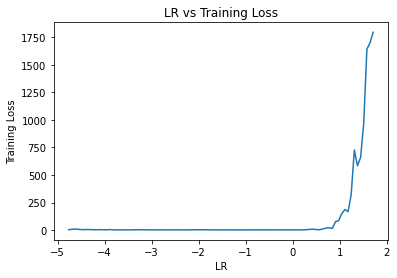

In [ ]:
display_graphs(l1,l2,l3,l4,l5)
#print(l2[0])

Regenerating model with One Cycle policy LR Scheduler

In [ ]:
# Creating fresh model for training with OCP LRs
model = Create_Model()
model,optimizer,device,lr_scheduler = initialize_model(p_model = model,  p_train_mode = 'Y'
                                                ,p_train_loss_lst = l1,p_lr_lst = l5,p_lr = lr
                                                )
#==> Max LR dervied for Min Loss =  [0.2364477732614316]-83%/.4-failed/.09 - higest/.29-failed/0.1680 - BEST
#0.094 - 89%

==> Initializing Model...
==> Model initilaized on  cuda
==> Initializing Optimizer...
==> Adam optimizer initialized
==> Max LR dervied for Min Loss =  0.09
==> OCP Scheduler initialized with Max LR - 0.09
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 3, 32, 32]              27
       BatchNorm2d-2            [-1, 3, 32, 32]               6
              ReLU-3            [-1, 3, 32, 32]               0
            Conv2d-4           [-1, 64, 32, 32]             192
       BatchNorm2d-5           [-1, 64, 32, 32]             128
              ReLU-6           [-1, 64, 32, 32]               0
            Conv2d-7           [-1, 64, 32, 32]             576
       BatchNorm2d-8           [-1, 64, 32, 32]             128
              ReLU-9           [-1, 64, 32, 32]               0
           Conv2d-10          [-1, 128, 32, 32]           8,192
        MaxPool2d-11    

Training model with with 24 epochs

In [ ]:
epoch = 24
new_l1,new_l2,new_l3,new_l4,new_l5 = run_train_test_epochs(p_epochs = epoch,p_batch_size = batch_size,p_model = model,p_optimizer= optimizer
                                       ,p_device=device,p_train_mode = 'Y',p_lr_scheduler = lr_scheduler
                                       ,p_train_loader = train_loader, p_test_loader = test_loader)

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)



==> Setting One cycle policy LR rate for optimizer. LR set to  [0.01185046584300227]

==> Train loop for Epoch #: 1


Loss=3.0011236667633057 Batch_id=97 Accuracy=23.60: 100%|██████████| 98/98 [00:24<00:00,  3.99it/s]

==> Test loop for Epoch #: 0


Test set: Average loss: 0.0002, Accuracy: 3501/10000 (35.01%)


==> Setting One cycle policy LR rate for optimizer. LR set to  [0.03345046584300227]

==> Train loop for Epoch #: 2


Loss=1.150233507156372 Batch_id=97 Accuracy=45.47: 100%|██████████| 98/98 [00:24<00:00,  3.98it/s]

==> Test loop for Epoch #: 1


Test set: Average loss: 0.0001, Accuracy: 5328/10000 (53.28%)


==> Setting One cycle policy LR rate for optimizer. LR set to  [0.060149534156997725]

==> Train loop for Epoch #: 3


Loss=0.9197980761528015 Batch_id=97 Accuracy=59.20: 100%|██████████| 98/98 [00:24<00:00,  3.95it/s]

==> Test loop for Epoch #: 2


Test set: Average loss: 0.0001, Accuracy: 5773/10000 (57.73%)


==> Setting One cycle policy LR rate for optimizer. LR set to  [0.08174953415699772]

==> Train loop for Epoch #: 4


Loss=0.9397071599960327 Batch_id=97 Accuracy=65.55: 100%|██████████| 98/98 [00:24<00:00,  4.00it/s]

==> Test loop for Epoch #: 3


Test set: Average loss: 0.0002, Accuracy: 5239/10000 (52.39%)


==> Setting One cycle policy LR rate for optimizer. LR set to  [0.09]

==> Train loop for Epoch #: 5


Loss=0.8714221119880676 Batch_id=97 Accuracy=69.73: 100%|██████████| 98/98 [00:24<00:00,  3.98it/s]

==> Test loop for Epoch #: 4


Test set: Average loss: 0.0002, Accuracy: 4869/10000 (48.69%)


==> Setting One cycle policy LR rate for optimizer. LR set to  [0.08931635162015382]

==> Train loop for Epoch #: 6


Loss=0.6285414695739746 Batch_id=97 Accuracy=72.84: 100%|██████████| 98/98 [00:24<00:00,  4.01it/s]

==> Test loop for Epoch #: 5


Test set: Average loss: 0.0001, Accuracy: 5975/10000 (59.75%)


==> Setting One cycle policy LR rate for optimizer. LR set to  [0.08728617879069414]

==> Train loop for Epoch #: 7


Loss=0.6875219345092773 Batch_id=97 Accuracy=74.97: 100%|██████████| 98/98 [00:24<00:00,  3.98it/s]

==> Test loop for Epoch #: 6


Test set: Average loss: 0.0001, Accuracy: 7207/10000 (72.07%)


==> Setting One cycle policy LR rate for optimizer. LR set to  [0.08397116728572707]

==> Train loop for Epoch #: 8


Loss=0.6274009943008423 Batch_id=97 Accuracy=76.60: 100%|██████████| 98/98 [00:24<00:00,  3.98it/s]

==> Test loop for Epoch #: 7


Test set: Average loss: 0.0001, Accuracy: 7289/10000 (72.89%)


==> Setting One cycle policy LR rate for optimizer. LR set to  [0.07947204205235424]

==> Train loop for Epoch #: 9


Loss=0.6008208394050598 Batch_id=97 Accuracy=78.73: 100%|██████████| 98/98 [00:24<00:00,  4.01it/s]

==> Test loop for Epoch #: 8


Test set: Average loss: 0.0001, Accuracy: 7765/10000 (77.65%)


==> Setting One cycle policy LR rate for optimizer. LR set to  [0.07392550673412453]

==> Train loop for Epoch #: 10


Loss=0.5531831383705139 Batch_id=97 Accuracy=79.64: 100%|██████████| 98/98 [00:24<00:00,  4.02it/s]

==> Test loop for Epoch #: 9


Test set: Average loss: 0.0001, Accuracy: 7408/10000 (74.08%)


==> Setting One cycle policy LR rate for optimizer. LR set to  [0.06750009]

==> Train loop for Epoch #: 11


Loss=0.535610556602478 Batch_id=97 Accuracy=80.97: 100%|██████████| 98/98 [00:24<00:00,  4.01it/s]

==> Test loop for Epoch #: 10


Test set: Average loss: 0.0001, Accuracy: 7735/10000 (77.35%)


==> Setting One cycle policy LR rate for optimizer. LR set to  [0.06039102488602929]

==> Train loop for Epoch #: 12


Loss=0.44871896505355835 Batch_id=97 Accuracy=81.98: 100%|██████████| 98/98 [00:24<00:00,  4.05it/s]

==> Test loop for Epoch #: 11


Test set: Average loss: 0.0001, Accuracy: 7909/10000 (79.09%)


==> Setting One cycle policy LR rate for optimizer. LR set to  [0.05281431673833989]

==> Train loop for Epoch #: 13


Loss=0.39751961827278137 Batch_id=97 Accuracy=83.61: 100%|██████████| 98/98 [00:24<00:00,  4.02it/s]

==> Test loop for Epoch #: 12


Test set: Average loss: 0.0001, Accuracy: 7991/10000 (79.91%)


==> Setting One cycle policy LR rate for optimizer. LR set to  [0.045000179999999994]

==> Train loop for Epoch #: 14


Loss=0.5131457448005676 Batch_id=97 Accuracy=84.31: 100%|██████████| 98/98 [00:24<00:00,  3.99it/s]

==> Test loop for Epoch #: 13


Test set: Average loss: 0.0001, Accuracy: 8218/10000 (82.18%)


==> Setting One cycle policy LR rate for optimizer. LR set to  [0.03718604326166011]

==> Train loop for Epoch #: 15


Loss=0.4515920877456665 Batch_id=97 Accuracy=85.29: 100%|██████████| 98/98 [00:24<00:00,  4.01it/s]

==> Test loop for Epoch #: 14


Test set: Average loss: 0.0000, Accuracy: 8437/10000 (84.37%)


==> Setting One cycle policy LR rate for optimizer. LR set to  [0.02960933511397071]

==> Train loop for Epoch #: 16


Loss=0.4025510251522064 Batch_id=97 Accuracy=86.44: 100%|██████████| 98/98 [00:24<00:00,  4.02it/s]

==> Test loop for Epoch #: 15


Test set: Average loss: 0.0001, Accuracy: 8400/10000 (84.00%)


==> Setting One cycle policy LR rate for optimizer. LR set to  [0.02250027000000001]

==> Train loop for Epoch #: 17


Loss=0.36838170886039734 Batch_id=97 Accuracy=87.16: 100%|██████████| 98/98 [00:24<00:00,  4.02it/s]

==> Test loop for Epoch #: 16


Test set: Average loss: 0.0000, Accuracy: 8582/10000 (85.82%)


==> Setting One cycle policy LR rate for optimizer. LR set to  [0.01607485326587547]

==> Train loop for Epoch #: 18


Loss=0.3576369285583496 Batch_id=97 Accuracy=88.16: 100%|██████████| 98/98 [00:24<00:00,  3.98it/s]

==> Test loop for Epoch #: 17


Test set: Average loss: 0.0000, Accuracy: 8580/10000 (85.80%)


==> Setting One cycle policy LR rate for optimizer. LR set to  [0.010528317947645754]

==> Train loop for Epoch #: 19


Loss=0.30609890818595886 Batch_id=97 Accuracy=89.04: 100%|██████████| 98/98 [00:24<00:00,  4.02it/s]

==> Test loop for Epoch #: 18


Test set: Average loss: 0.0000, Accuracy: 8718/10000 (87.18%)


==> Setting One cycle policy LR rate for optimizer. LR set to  [0.006029192714272939]

==> Train loop for Epoch #: 20


Loss=0.30424991250038147 Batch_id=97 Accuracy=89.63: 100%|██████████| 98/98 [00:24<00:00,  3.93it/s]

==> Test loop for Epoch #: 19


Test set: Average loss: 0.0000, Accuracy: 8743/10000 (87.43%)


==> Setting One cycle policy LR rate for optimizer. LR set to  [0.002714181209305867]

==> Train loop for Epoch #: 21


Loss=0.24335606396198273 Batch_id=97 Accuracy=90.05: 100%|██████████| 98/98 [00:24<00:00,  3.98it/s]

==> Test loop for Epoch #: 20


Test set: Average loss: 0.0000, Accuracy: 8758/10000 (87.58%)


==> Setting One cycle policy LR rate for optimizer. LR set to  [0.0006840083798461813]

==> Train loop for Epoch #: 22


Loss=0.25869330763816833 Batch_id=97 Accuracy=90.22: 100%|██████████| 98/98 [00:24<00:00,  3.96it/s]

==> Test loop for Epoch #: 21


Test set: Average loss: 0.0000, Accuracy: 8772/10000 (87.72%)


==> Setting One cycle policy LR rate for optimizer. LR set to  [3.6e-07]

==> Train loop for Epoch #: 23


Loss=0.28783318400382996 Batch_id=97 Accuracy=90.53: 100%|██████████| 98/98 [00:24<00:00,  3.97it/s]

==> Test loop for Epoch #: 22


Test set: Average loss: 0.0000, Accuracy: 8782/10000 (87.82%)


==> Setting One cycle policy LR rate for optimizer. LR set to  [0.0006840083798461813]

==> Train loop for Epoch #: 24


Loss=0.26221275329589844 Batch_id=97 Accuracy=90.33: 100%|██████████| 98/98 [00:25<00:00,  3.92it/s]

==> Test loop for Epoch #: 23


Test set: Average loss: 0.0000, Accuracy: 8776/10000 (87.76%)



Train/Test Loss/Accuracy graphs

Loss and Accuracy graphs


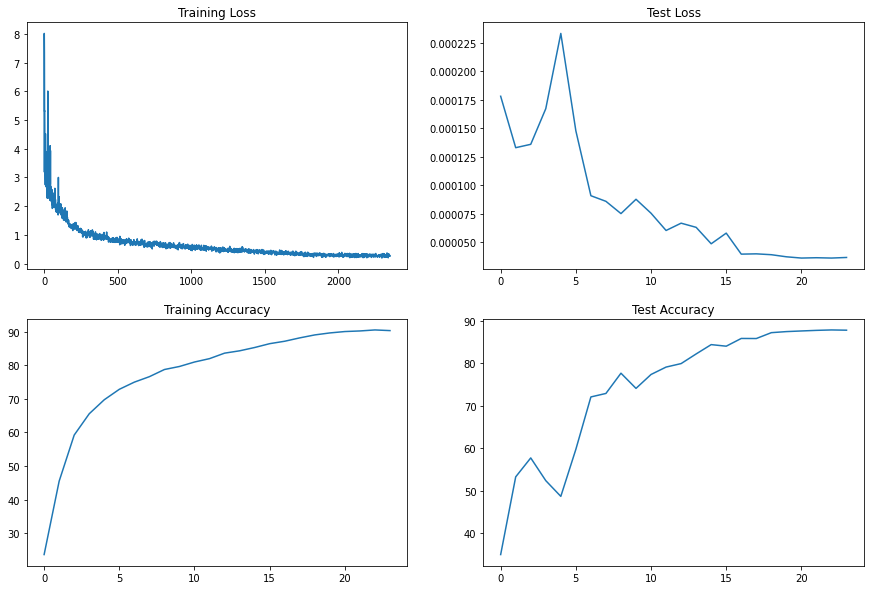

LR Batch Test


In [ ]:
display_graphs(new_l1,new_l2,new_l3,new_l4,new_l5)

Priniting 10 missclassified images and their heatmaps

Misclassified images for Batch Normalization
Checking batch # 1


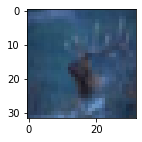

The model predicted the above image as - airplane
Actual label of the above image is - deer


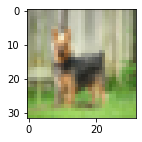

The model predicted the above image as - deer
Actual label of the above image is - dog


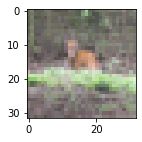

The model predicted the above image as - frog
Actual label of the above image is - deer


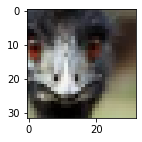

The model predicted the above image as - cat
Actual label of the above image is - bird


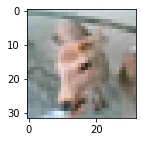

The model predicted the above image as - dog
Actual label of the above image is - deer


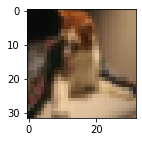

The model predicted the above image as - dog
Actual label of the above image is - cat


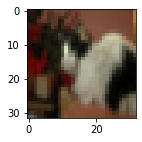

The model predicted the above image as - dog
Actual label of the above image is - cat


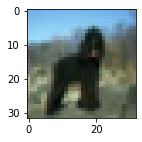

The model predicted the above image as - cat
Actual label of the above image is - dog


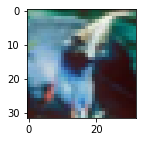

The model predicted the above image as - horse
Actual label of the above image is - bird


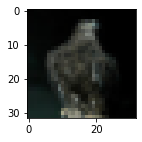

The model predicted the above image as - frog
Actual label of the above image is - bird
10 misclassified images found.. Processing stopped
10 misclassified images as below -  


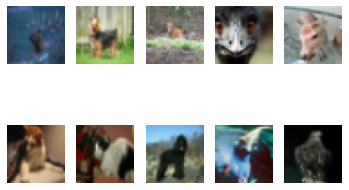

In [ ]:
img_lst = []
img_lst = find_misclassified_img(p_images = 10, p_model = model,p_device = 'cpu'
                                ,p_test_loader = test_loader, p_test_set=test_set
                                )


/content/drive/MyDrive/EVA-7-Repo/utils.py:128: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_img = torch.tensor(p_img_list[i])



 Gradcam images for above images as below 



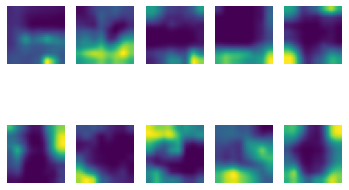

In [ ]:
gen_heatmap(p_img_list = img_lst,p_model= model,p_target_layers= model.Conv_X2,p_category=1)

In [ ]:
PATH = "\content\drive\MyDrive\EVA-7-Repo\resnet_model.h5"
#PATH = "/content/drive/MyDrive/EVA-7-Repo"
torch.save(model,PATH)
#model1 = torch.load(PATH)



In [ ]:
End Stop...
import torch
PATH = "\content\drive\MyDrive\EVA-7-Repo\resnet_model.h5"
model1 = torch.load(PATH)

In [ ]:
End Stop...